In [1]:
import sys

In [ ]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Please append your own directory after ‘/content/drive/My Drive/'
# where you have nutil.py and adult_subsample.csv
### ========== TODO : START ========== ###
# for example: sys.path += ['/content/drive/My Drive/cs146/hw2'] 
### ========== TODO : END ========== ###

In [2]:
from nutil import *

In [3]:
# Use only the provided packages!
import math
import csv

from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import learning_curve

In [4]:
######################################################################
# Immutatble classes
######################################################################

class Classifier(object) :
    """
    Classifier interface.
    """

    def fit(self, X, y):
        raise NotImplementedError()

    def predict(self, X):
        raise NotImplementedError()


class MajorityVoteClassifier(Classifier) :

    def __init__(self) :
        """
        A classifier that always predicts the majority class.

        Attributes
        --------------------
            prediction_ -- majority class
        """
        self.prediction_ = None

    def fit(self, X, y) :
        """
        Build a majority vote classifier from the training set (X, y).

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes

        Returns
        --------------------
            self -- an instance of self
        """
        majority_val = Counter(y).most_common(1)[0][0]
        self.prediction_ = majority_val
        return self

    def predict(self, X) :
        """
        Predict class values.

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples

        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.prediction_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")

        n,d = X.shape
        y = [self.prediction_] * n
        return y



In [18]:
######################################################################
# Mutatble classes
######################################################################

class RandomClassifier(Classifier) :

    def __init__(self) :
        """
        A classifier that predicts according to the distribution of the classes.

        Attributes
        --------------------
            probabilities_ -- class distribution dict (key = class, val = probability of class)
        """
        self.probabilities_ = None

    def fit(self, X, y) :
        """
        Build a random classifier from the training set (X, y).

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes

        Returns
        --------------------
            self -- an instance of self
        """

        ### ========== TODO : START ========== ###
        # part b: set self.probabilities_ according to the training set
        self.probabilities_ = (Counter(y).most_common(1)[0][1]) * (0.001)

        ### ========== TODO : END ========== ###

        return self

    def predict(self, X, seed=1234) :
        """
        Predict class values.

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            seed -- integer, random seed

        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.probabilities_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")
        np.random.seed(seed)

        ### ========== TODO : START ========== ###
        # part b: predict the class for each test example
        # hint: use np.random.choice (be careful of the parameters)
        predictions = []
  
        n,d = X.shape

        for i in range(n):
          new_prediction = np.random.choice(2, 1, p=[self.probabilities_, 1 - self.probabilities_])
          predictions.append(new_prediction)
        
        y = predictions
        
        ### ========== TODO : END ========== ###

        return y


In [11]:
######################################################################
# Immutatble functions
######################################################################

def plot_histograms(X, y, Xnames, yname) :
    n,d = X.shape  # n = number of examples, d =  number of features
    fig = plt.figure(figsize=(20,15))
    ncol = 3
    nrow = d // ncol + 1
    for i in range(d) :
        fig.add_subplot (nrow,ncol,i+1)
        data, bins, align, labels = plot_histogram(X[:,i], y, Xname=Xnames[i], yname=yname, show = False)
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xnames[i])
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')

    plt.savefig ('histograms.pdf')


def plot_histogram(X, y, Xname, yname, show = True) :
    """
    Plots histogram of values in X grouped by y.

    Parameters
    --------------------
        X     -- numpy array of shape (n,d), feature values
        y     -- numpy array of shape (n,), target classes
        Xname -- string, name of feature
        yname -- string, name of target
    """

    # set up data for plotting
    targets = sorted(set(y))
    data = []; labels = []
    for target in targets :
        features = [X[i] for i in range(len(y)) if y[i] == target]
        data.append(features)
        labels.append('%s = %s' % (yname, target))

    # set up histogram bins
    features = set(X)
    nfeatures = len(features)
    test_range = list(range(int(math.floor(min(features))), int(math.ceil(max(features)))+1))
    if nfeatures < 10 and sorted(features) == test_range:
        bins = test_range + [test_range[-1] + 1] # add last bin
        align = 'left'
    else :
        bins = 10
        align = 'mid'

    # plot
    if show == True:
        plt.figure()
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xname)
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')
        plt.show()

    return data, bins, align, labels


In [24]:
######################################################################
# Mutatble functions
######################################################################

def error(clf, X, y, ntrials=100, test_size=0.2) :
    """
    Computes the classifier error over a random split of the data,
    averaged over ntrials runs.

    Parameters
    --------------------
        clf         -- classifier
        X           -- numpy array of shape (n,d), features values
        y           -- numpy array of shape (n,), target classes
        ntrials     -- integer, number of trials

    Returns
    --------------------
        train_error -- float, training error
        test_error  -- float, test error
        f1_score    -- float, test "micro" averaged f1 score
    """

    ### ========== TODO : START ========== ###
    # part e:
    # compute cross-validation error using StratifiedShuffleSplit over ntrials
    # hint: use StratifiedShuffleSplit (be careful of the parameters)
    sss = StratifiedShuffleSplit(test_size=test_size, random_state=0, n_splits=ntrials)
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
    clf.fit(X_train, y_train)

    #training error
    y_pred = clf.predict(X_train)
    train_error_t = 1 - metrics.accuracy_score(y_train, y_pred, normalize=True)

    #test error
    y_pred = clf.predict(X_test)
    test_error_t = 1 - metrics.accuracy_score(y_test, y_pred, normalize=True)

    #f1 score
    f1_score_t = metrics.f1_score(y_test, y_pred, average='micro')
    
    train_error = train_error_t / ntrials
    test_error = test_error_t / ntrials
    f1_score = f1_score_t / ntrials
    ### ========== TODO : END ========== ###

    return train_error, test_error, f1_score




In [16]:
######################################################################
# Immutatble functions
######################################################################


def write_predictions(y_pred, filename, yname=None) :
    """Write out predictions to csv file."""
    out = open(filename, 'wb')
    f = csv.writer(out)
    if yname :
        f.writerow([yname])
    f.writerows(list(zip(y_pred)))
    out.close()


In [9]:
######################################################################
# main
######################################################################
    
# load adult_subsample dataset with correct file path

### ========== TODO : START ========== ###
# for example data_file =  "/content/drive/My Drive/cs146/hw1/adult_subsample.csv"
data_file = "/Users/codylejang/Downloads/hw2_code/adult_subsample.csv"
### ========== TODO : END ========== ###

data = load_data(data_file, header=1, predict_col=-1)

X = data.X; Xnames = data.Xnames
y = data.y; yname = data.yname
n,d = X.shape  # n = number of examples, d =  number of features


Plotting...


<Figure size 640x480 with 0 Axes>

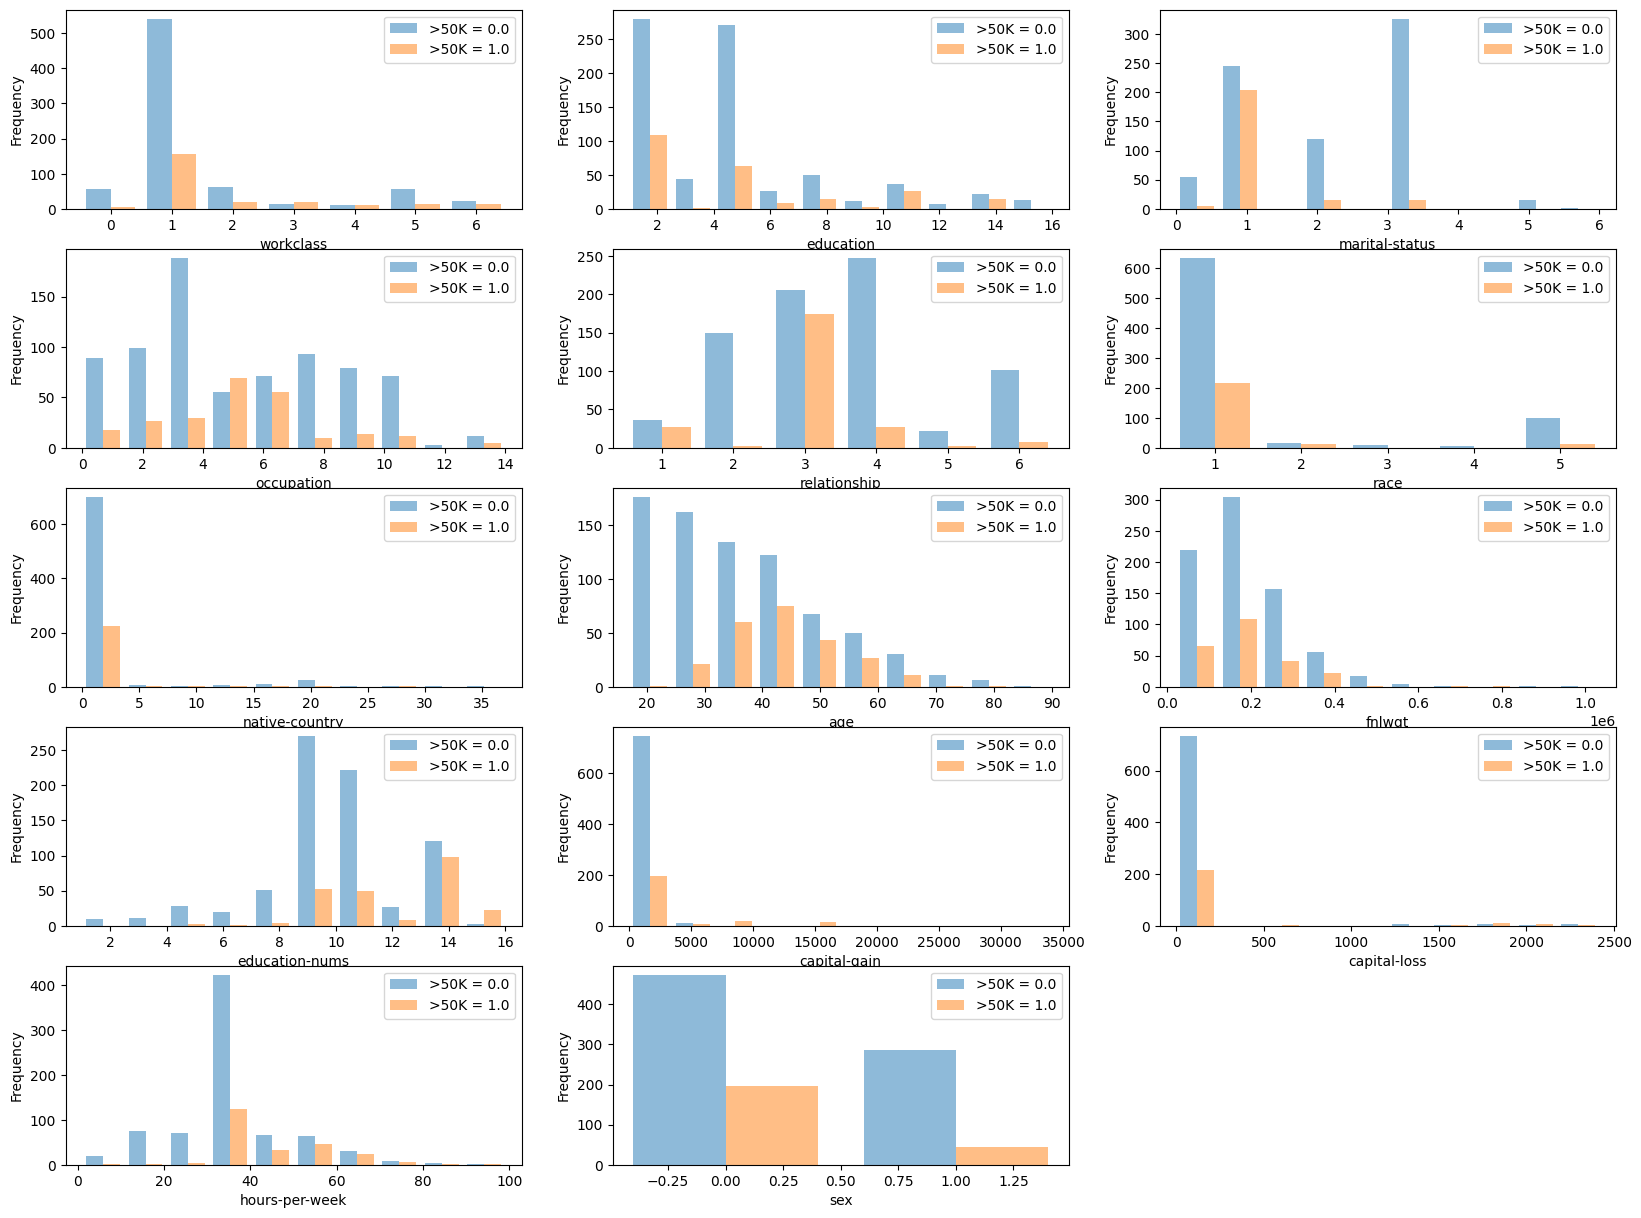

In [12]:
plt.figure()
#========================================
# part a: plot histograms of each feature
print('Plotting...')
plot_histograms (X, y, Xnames=Xnames, yname=yname)

In [13]:
#========================================
# train Majority Vote classifier on data
print('Classifying using Majority Vote...')
clf = MajorityVoteClassifier() # create MajorityVote classifier, which includes all model parameters
clf.fit(X, y)                  # fit training data using the classifier
y_pred = clf.predict(X)        # take the classifier and run it on the training data
train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
print('\t-- training error: %.3f' % train_error)

Classifying using Majority Vote...
	-- training error: 0.240


In [19]:
### ========== TODO : START ========== ###
# part b: evaluate training error of Random classifier
print('Classifying using Random classifier...')
clf = RandomClassifier()
clf.fit(X, y)                 
y_pred = clf.predict(X)        
train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
print('\t-- training error: %.3f' % train_error)

### ========== TODO : END ========== ###

Random classifier:
	-- training error: 0.374


In [20]:
### ========== TODO : START ========== ###
# part c: evaluate training error of Decision Tree classifier
print('Classifying using Decision Tree...')
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X, y)
y_pred = clf.predict(X)       
train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
print('\t-- training error: %.3f' % train_error)
### ========== TODO : END ========== ###

Classifying using Decision Tree...
	-- training error: 0.000


In [21]:
### ========== TODO : START ========== ###
# part d: evaluate training error of k-Nearest Neighbors classifier
# use k = 3, 5, 7 for n_neighbors
print('Classifying using k-Nearest Neighbors (k = 3)')
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)
y_pred = clf.predict(X)        
train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
print('\t-- training error for k = 3 : %.3f' % train_error)

print('Classifying using k-Nearest Neighbors (k = 5)')
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)
y_pred = clf.predict(X)        
train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
print('\t-- training error for k = 5 : %.3f' % train_error)

print('Classifying using k-Nearest Neighbors (k = 7)')
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X, y)
y_pred = clf.predict(X)        
train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
print('\t-- training error for k = 7 : %.3f' % train_error)
### ========== TODO : END ========== ###

Classifying using k-Nearest Neighbors (k = 3)
	-- training error for k = 3 : 0.153
Classifying using k-Nearest Neighbors (k = 5)
	-- training error for k = 5 : 0.195
Classifying using k-Nearest Neighbors (k = 7)
	-- training error for k = 7 : 0.213


In [23]:
### ========== TODO : START ========== ###
# part e: evaluate training error of Logistic Regression
# use lambda_ = 0.1, 1, 10 for n_neighbors
print('Classifying using Logistic Regression (lambda_ = 0.1)')
clf = LogisticRegression(C=10,random_state=0,max_iter=1000)
clf.fit(X, y)
y_pred = clf.predict(X)        
train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
print('\t-- training error for lambda_ = 0.1 : %.3f' % train_error)

print('Classifying using Logistic Regression (lambda_ = 1)')
clf = LogisticRegression(C=1,random_state=0,max_iter=1000)
clf.fit(X, y)
y_pred = clf.predict(X)        
train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
print('\t-- training error for lambda_ = 1 : %.3f' % train_error)

print('Classifying using Logistic Regression (lambda_ = 10)')
clf = LogisticRegression(C=0.1,random_state=0,max_iter=1000)
clf.fit(X, y)
y_pred = clf.predict(X)        
train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
print('\t-- training error for lambda_ = 10 : %.3f' % train_error)

Classifying using Logistic Regression (lambda_ = 0.1)
	-- training error for lambda_ = 0.1 : 0.208
Classifying using Logistic Regression (lambda_ = 1)
	-- training error for lambda_ = 1 : 0.208
Classifying using Logistic Regression (lambda_ = 10)
	-- training error for lambda_ = 10 : 0.213


In [27]:
### ========== TODO : START ========== ###
# part f: use cross-validation to compute average training and test error of classifiers
print('Investigating various classifiers...')
clf = MajorityVoteClassifier()
train_error, test_error, f1_score = error(clf, X, y, test_size=0.15)
print('\t-- Majority Vote Classifier Training Error: %.3f' % train_error)
print('\t-- Majority Vote Classifier Test Error: %.3f' % test_error)
print('\t-- Majority Vote Classifier F1 Score: %.3f' % f1_score)
print('\n')

clf = RandomClassifier() 
train_error, test_error, f1_score = error(clf, X, y, test_size=0.15)
print('\t-- Random Classifier Training Error: %.3f' % train_error)
print('\t-- Random Classifier Test Error: %.3f' % test_error)
print('\t-- Random Classifier F1 Score: %.3f' % f1_score)
print('\n')

clf = DecisionTreeClassifier(criterion="entropy")
train_error, test_error, f1_score = error(clf, X, y, test_size=0.15)
print('\t-- Decision Tree Classifier Training Error: %.3f' % train_error)
print('\t-- Decision Tree Classifier Test Error: %.3f' % test_error)
print('\t-- Decision Tree Classifier F1 Score: %.3f' % f1_score)
print('\n')

clf = KNeighborsClassifier(n_neighbors=5)
train_error, test_error, f1_score = error(clf, X, y, test_size=0.15)
print('\t-- KNeighbors Classifier Training Error: %.3f' % train_error)
print('\t-- KNeighbors Classifier Test Error: %.3f' % test_error)
print('\t-- KNeighbors Classifier F1 Score: %.3f' % f1_score)
print('\n')

clf = LogisticRegression(C=1,random_state=0,max_iter=1000)
train_error, test_error, f1_score = error(clf, X, y, test_size=0.15)
print('\t-- Logistic Regression Training Error: %.3f' % train_error)
print('\t-- Logistic Regression Test Error: %.3f' % test_error)
print('\t-- Logistic Regression F1 Score: %.3f' % f1_score)
print('\n')
### ========== TODO : END ========== ###

Investigating various classifiers...
	-- Majority Vote Classifier Training Error: 0.002
	-- Majority Vote Classifier Test Error: 0.002
	-- Majority Vote Classifier F1 Score: 0.008


	-- Random Classifier Training Error: 0.004
	-- Random Classifier Test Error: 0.005
	-- Random Classifier F1 Score: 0.005


	-- Decision Tree Classifier Training Error: 0.000
	-- Decision Tree Classifier Test Error: 0.002
	-- Decision Tree Classifier F1 Score: 0.008


	-- KNeighbors Classifier Training Error: 0.002
	-- KNeighbors Classifier Test Error: 0.003
	-- KNeighbors Classifier F1 Score: 0.007


	-- Logistic Regression Training Error: 0.002
	-- Logistic Regression Test Error: 0.002
	-- Logistic Regression F1 Score: 0.008




Finding the best k...


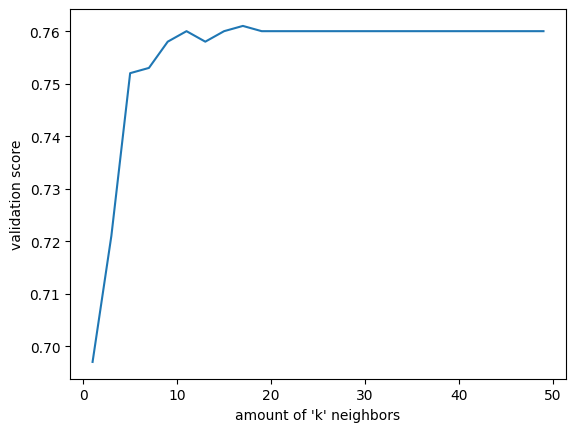

[0.697, 0.7210000000000001, 0.752, 0.7529999999999999, 0.758, 0.76, 0.7580000000000001, 0.76, 0.7609999999999999, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76]


In [45]:
### ========== TODO : START ========== ###
# part g: use 5-fold cross-validation to find the best value of k for k-Nearest Neighbors classifier
print('Finding the best k...')
k_values = []
cross_val_scores = []
for i in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=i)
    k_values.append(i)

    cross_val_scores.append(np.mean(cross_val_score(clf, X, y, cv=5)))


plt.figure()
plt.plot(k_values, cross_val_scores)
plt.xlabel("amount of 'k' neighbors")
plt.ylabel("validation score")
plt.show()
print(cross_val_scores)

### ========== TODO : END ========== ###

Investigating depths...


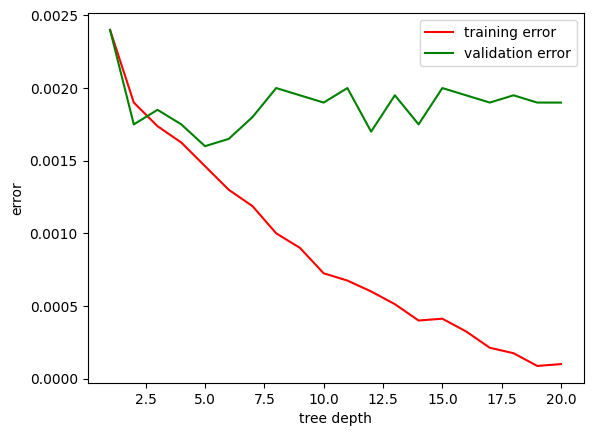

In [42]:
### ========== TODO : START ========== ###
# part h: investigate decision tree classifier with various depths
print('Investigating depths...')
tree_training_error = []
tree_validation_error = []
tree_depth = []
for depth in range(1,21):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    training_error, validation_error, _ = error(clf, X, y)
    tree_training_error.append(training_error)
    tree_validation_error.append(validation_error)
    tree_depth.append(depth)

plt.figure()
plt.plot(tree_depth, tree_training_error, color='r', label='training error') 
plt.plot(tree_depth, tree_validation_error, color='g', label='validation error') 
plt.xlabel("tree depth")
plt.ylabel("error")
plt.legend()
plt.show()
### ========== TODO : END ========== ###

In [43]:
print('Done')

Done
